# Global_CO2_Emissions_Analysis

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive visualizations
import plotly.express as px
import plotly.graph_objects as go

# Setting up visualization aesthetics
sns.set(style="whitegrid")
plt.style.use('seaborn-whitegrid')

C:\Users\Azeez.HAMZAT\AppData\Local\Temp\ipykernel_26888\4175537853.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Load and Inspect the Dataset

In [4]:
# Load the dataset
df = pd.read_csv('co2_emissions_kt_by_country.csv')

# Display the first few rows of the dataset to inspect
df.head()

country_code country_name  year      value
0          ABW        Aruba  1960  11092.675
1          ABW        Aruba  1961  11576.719
2          ABW        Aruba  1962  12713.489
3          ABW        Aruba  1963  12178.107
4          ABW        Aruba  1964  11840.743

In [5]:
# Display the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [6]:
# Basic statistics of the dataset
df.describe()

year         value
count  13953.000000  1.395300e+04
mean    1990.732316  8.254983e+05
std       17.187585  2.788923e+06
min     1960.000000 -8.067400e+01
25%     1976.000000  1.100000e+03
50%     1992.000000  1.390000e+04
75%     2006.000000  1.642779e+05
max     2019.000000  3.434401e+07

### Rename Columns

In [7]:
# Rename columns for easier access
df.rename(columns={
    'country_code': 'Country_Code',
    'country_name': 'Country',
    'year': 'Year',
    'value': 'CO2_emissions'
}, inplace=True)

# Confirm renaming
df.head()


Country_Code Country  Year  CO2_emissions
0          ABW   Aruba  1960      11092.675
1          ABW   Aruba  1961      11576.719
2          ABW   Aruba  1962      12713.489
3          ABW   Aruba  1963      12178.107
4          ABW   Aruba  1964      11840.743

### Handle Missing Data

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handling missing data (if any)
# We can drop rows with missing values or fill them with appropriate values (e.g., mean/median)
# df = df.dropna()

# Confirm there are no missing values left
# df.isnull().sum()

Country_Code     0
Country          0
Year             0
CO2_emissions    0
dtype: int64


### EDA

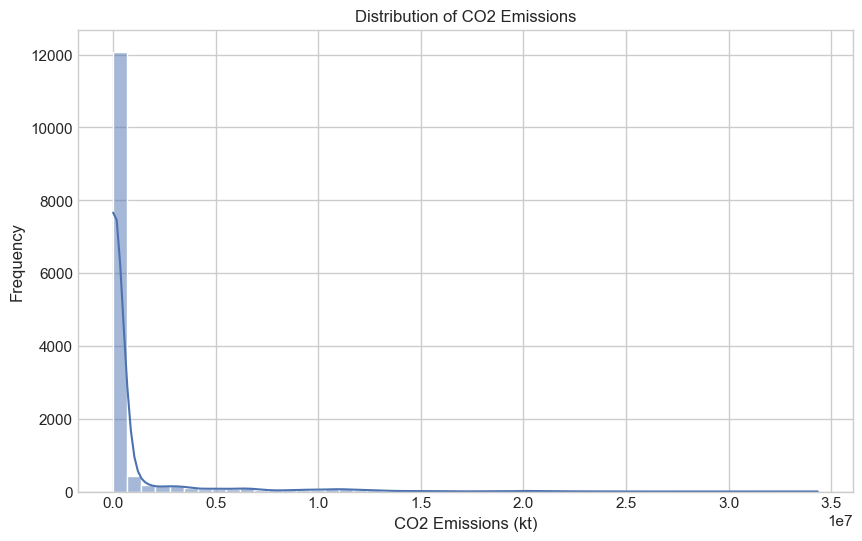

In [9]:
# Summary statistics for CO2 emissions
df['CO2_emissions'].describe()

# Distribution of CO2 emissions
plt.figure(figsize=(10,6))
sns.histplot(df['CO2_emissions'], bins=50, kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (kt)')
plt.ylabel('Frequency')
plt.show()

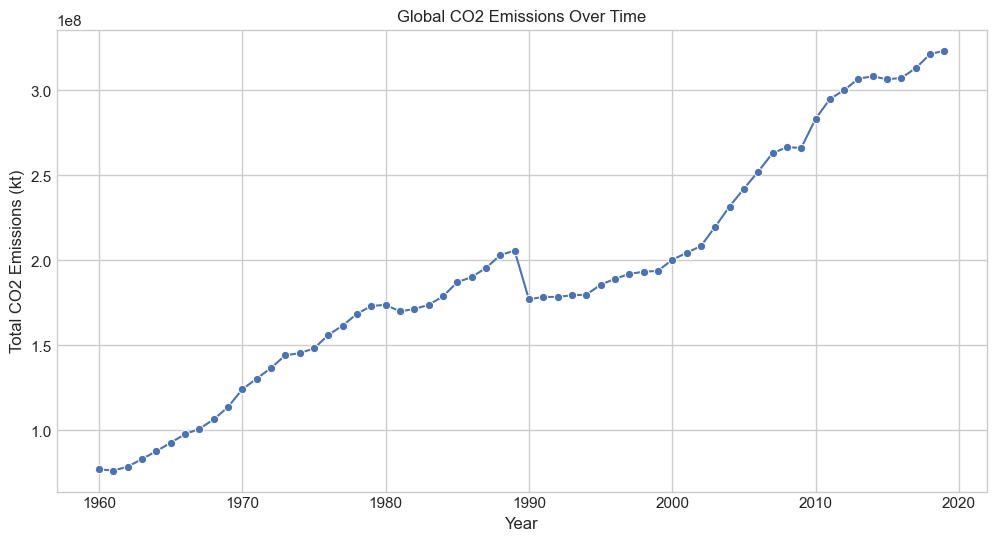

In [10]:
# CO2 emissions over time (globally)
df_global = df.groupby('Year')['CO2_emissions'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='CO2_emissions', data=df_global, marker='o')
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (kt)')
plt.show()

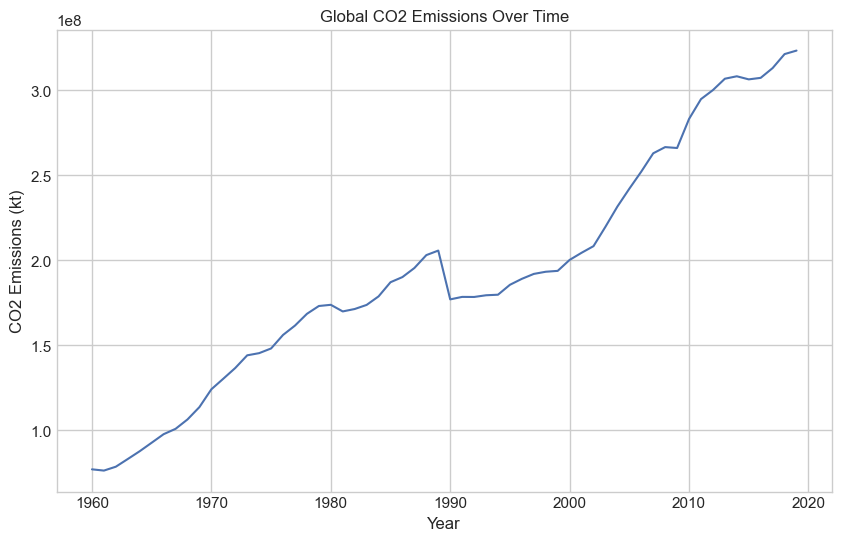

In [11]:
# Global CO2 Emissions Trends
plt.figure(figsize=(10, 6))
df.groupby('Year')['CO2_emissions'].sum().plot()
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.show()

### # Country-Level Trends: Top 10 Emitting Countries

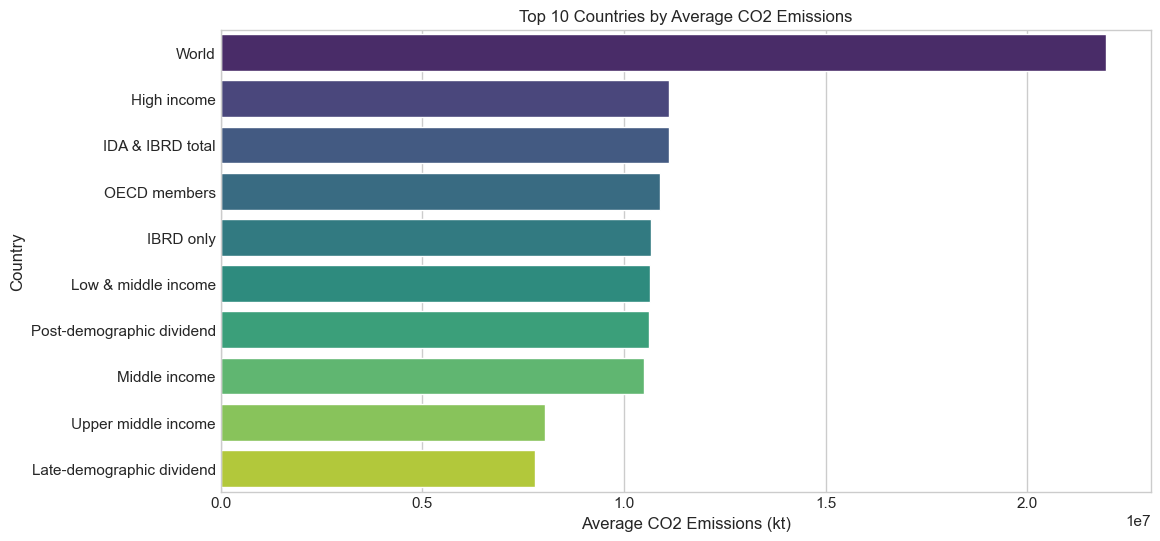

In [12]:
# barplot
top_countries = df.groupby('Country')['CO2_emissions'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='CO2_emissions', y='Country', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Average CO2 Emissions')
plt.xlabel('Average CO2 Emissions (kt)')
plt.ylabel('Country')
plt.show()

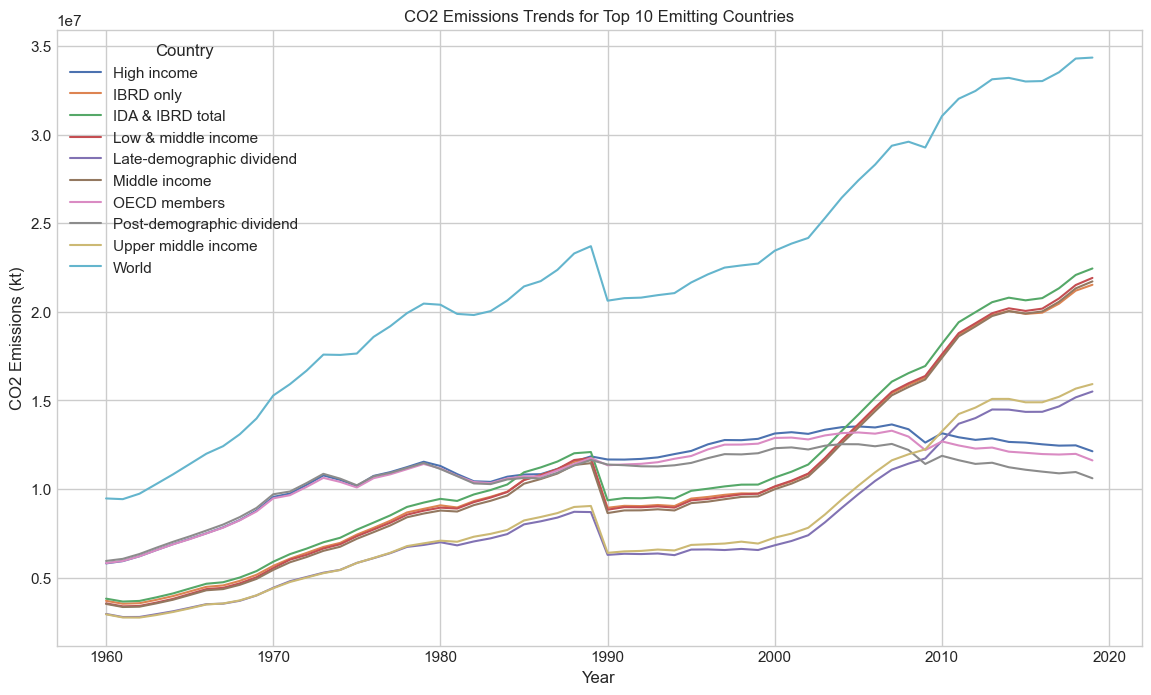

In [13]:
# Line plot
top_emitters = df.groupby('Country')['CO2_emissions'].sum().nlargest(10).index
df_top_emitters = df[df['Country'].isin(top_emitters)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_emitters, x='Year', y='CO2_emissions', hue='Country')
plt.title('CO2 Emissions Trends for Top 10 Emitting Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.show()

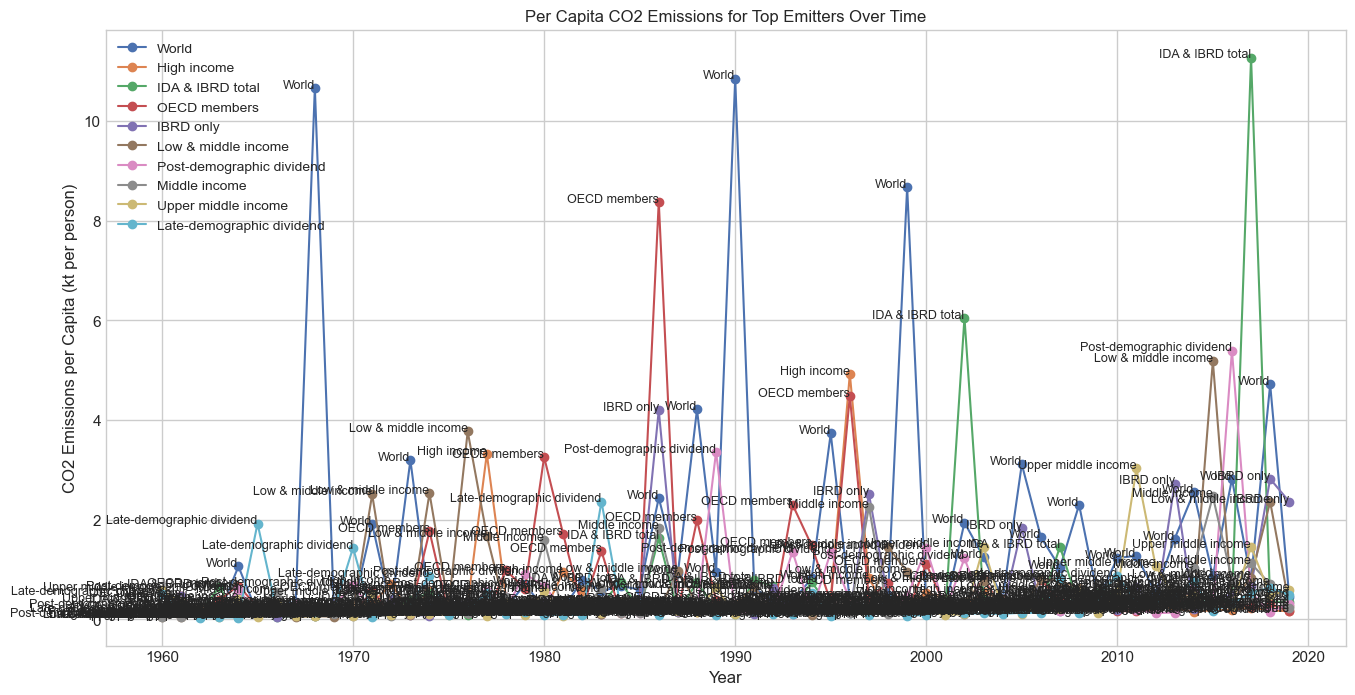

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the dataset has population data or we can add hypothetical values
# df['CO2_per_capita'] = df['CO2_emissions'] / df['Population']

# Example with a sample population data (randomly generated)
np.random.seed(42)
df['Population'] = np.random.randint(1e6, 1e8, df.shape[0])
df['CO2_per_capita'] = df['CO2_emissions'] / df['Population']

# Visualizing per capita emissions for top emitters
plt.figure(figsize=(16, 8))
for country in top_emitters:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['CO2_per_capita'], marker='o', label=country)
    
    # Adding labels directly on the lines
    for x, y in zip(country_data['Year'], country_data['CO2_per_capita']):
        plt.text(x, y, country, fontsize=9, ha='right')

plt.title('Per Capita CO2 Emissions for Top Emitters Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita (kt per person)')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()


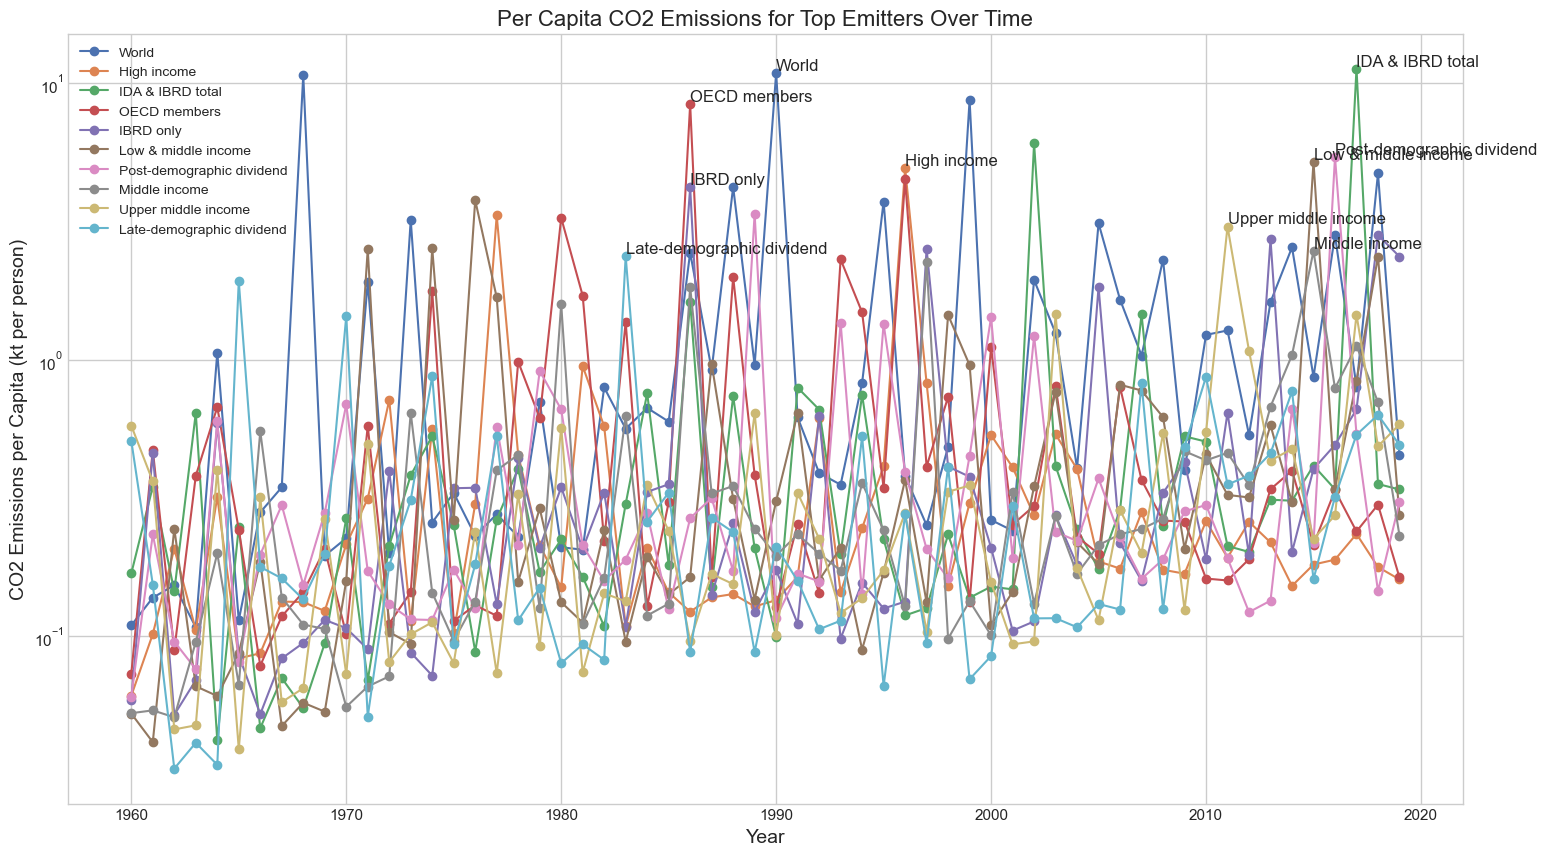

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the dataset has population data or we can add hypothetical values
# df['CO2_per_capita'] = df['CO2_emissions'] / df['Population']

# Example with a sample population data (randomly generated)
np.random.seed(42)
df['Population'] = np.random.randint(1e6, 1e8, df.shape[0])
df['CO2_per_capita'] = df['CO2_emissions'] / df['Population']

# Visualizing per capita emissions for top emitters
plt.figure(figsize=(18, 10))
for country in top_emitters:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['CO2_per_capita'], marker='o', label=country)
    
    # Find the highest point and label it
    max_idx = country_data['CO2_per_capita'].idxmax()
    max_year = country_data.loc[max_idx, 'Year']
    max_value = country_data.loc[max_idx, 'CO2_per_capita']
    plt.text(max_year, max_value, country, fontsize=12, ha='left', va='bottom')

plt.title('Per Capita CO2 Emissions for Top Emitters Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Emissions per Capita (kt per person)', fontsize=14)
plt.yscale('log')  # Optional: Use logarithmic scale if there is a wide range of values
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()


In [16]:
# Simplifying by assuming regions based on a mapping or by clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df[['CO2_emissions']])
df['Cluster'] = kmeans.labels_

# Visualizing cluster distribution
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Year', y='CO2_emissions', hue='Cluster', palette='Set1')
plt.title('CO2 Emissions Clusters Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(True)
plt.show()

NameError: name 'KMeans' is not defined

In [ ]:
# Calculate the year-on-year change in CO2 emissions
df['YOY_change'] = df.groupby('Country')['CO2_emissions'].pct_change() * 100

# Drop NaN values resulting from pct_change calculation
df.dropna(subset=['YOY_change'], inplace=True)

# Visualize the year-on-year change for a specific country (e.g., USA)
df_usa = df[df['Country'] == 'Nigeria']

plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='YOY_change', data=df_usa, marker='o')
plt.title('Year-on-Year Change in CO2 Emissions: Nigeria')
plt.xlabel('Year')
plt.ylabel('YOY Change (%)')
plt.show()

In [ ]:
# Calculate the year-on-year change in CO2 emissions
df['YOY_change'] = df.groupby('Country')['CO2_emissions'].pct_change() * 100

# Drop NaN values resulting from pct_change calculation
df.dropna(subset=['YOY_change'], inplace=True)

# Visualize the year-on-year change for a specific country (e.g., USA)
df_usa = df[df['Country'] == 'Morocco']

plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='YOY_change', data=df_usa, marker='o')
plt.title('Year-on-Year Change in CO2 Emissions: Morocco')
plt.xlabel('Year')
plt.ylabel('YOY Change (%)')
plt.show()

In [ ]:
# You can aggregate the data by region if you have regional data (e.g., continents)
# For simplicity, let's assume you want to group by continent
# Add a 'Continent' column if your dataset includes it, otherwise, this step is skipped

# CO2 emissions by continent over time
# This is a dummy example; you would need actual continent data
# df['Continent'] = df['Country'].map(country_to_continent_mapping)

# df_continent = df.groupby(['Continent', 'Year'])['CO2_emissions'].sum().reset_index()

# sns.lineplot(x='Year', y='CO2_emissions', hue='Continent', data=df_continent)
# plt.title('CO2 Emissions by Continent Over Time')
# plt.xlabel('Year')
# plt.ylabel('Total CO2 Emissions (kt)')
# plt.show()

In [ ]:
# Correlation matrix
corr_matrix = df[['Year', 'CO2_emissions', 'YOY_change']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# World map of CO2 emissions
fig = px.choropleth(df, 
                    locations="Country_Code", 
                    color="CO2_emissions", 
                    hover_name="Country", 
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Global CO2 Emissions Over Time')

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

In [ ]:
# Interactive line chart
fig = px.line(df_global, x='Year', y='CO2_emissions', title='Global CO2 Emissions Over Time')
fig.update_traces(mode='lines+markers')
fig.show()

In [17]:
# List of African country codes (ISO Alpha-3)
african_countries = ['DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 
                     'TCD', 'COM', 'COG', 'CIV', 'DJI', 'EGY', 'GNQ', 'ERI', 'SWZ', 
                     'ETH', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO', 'LBR', 
                     'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MAR', 'MOZ', 'NAM', 
                     'NER', 'NGA', 'RWA', 'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 
                     'SSD', 'SDN', 'TZA', 'TGO', 'TUN', 'UGA', 'ZMB', 'ZWE']

# Filter the dataset for African countries
df_africa = df[df['Country_Code'].isin(african_countries)]

# Display the first few rows to confirm
df_africa.head()

Country_Code Country  Year  CO2_emissions  Population  CO2_per_capita
237          AGO  Angola  1960        550.050    32378291        0.000017
238          AGO  Angola  1961        454.708    64020641        0.000007
239          AGO  Angola  1962       1180.774    37634821        0.000031
240          AGO  Angola  1963       1151.438    20433354        0.000056
241          AGO  Angola  1964       1224.778    17887294        0.000068

In [18]:
df.nunique().value_counts('Country').sum()

0.9999999999999999

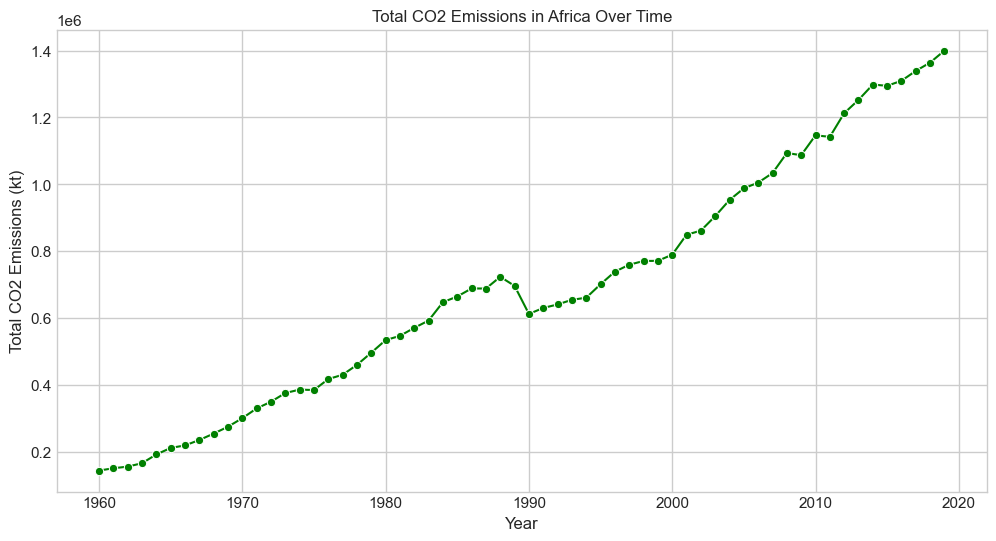

In [19]:
# CO2 emissions in Africa over time
df_africa_time = df_africa.groupby('Year')['CO2_emissions'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='CO2_emissions', data=df_africa_time, marker='o', color='green')
plt.title('Total CO2 Emissions in Africa Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (kt)')
plt.show()

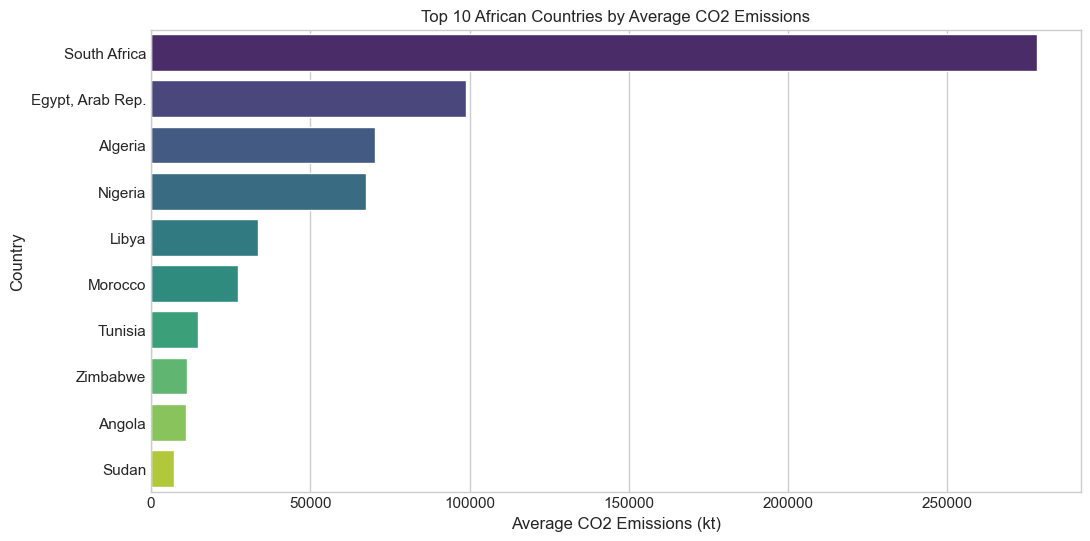

In [20]:
# Top 10 African countries by average CO2 emissions
top_african_countries = df_africa.groupby('Country')['CO2_emissions'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='CO2_emissions', y='Country', data=top_african_countries, palette='viridis')
plt.title('Top 10 African Countries by Average CO2 Emissions')
plt.xlabel('Average CO2 Emissions (kt)')
plt.ylabel('Country')
plt.show()

C:\Users\Azeez.HAMZAT\AppData\Local\Temp\ipykernel_26888\225276730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa['YOY_change'] = df_africa.groupby('Country')['CO2_emissions'].pct_change() * 100
C:\Users\Azeez.HAMZAT\AppData\Local\Temp\ipykernel_26888\225276730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa.dropna(subset=['YOY_change'], inplace=True)


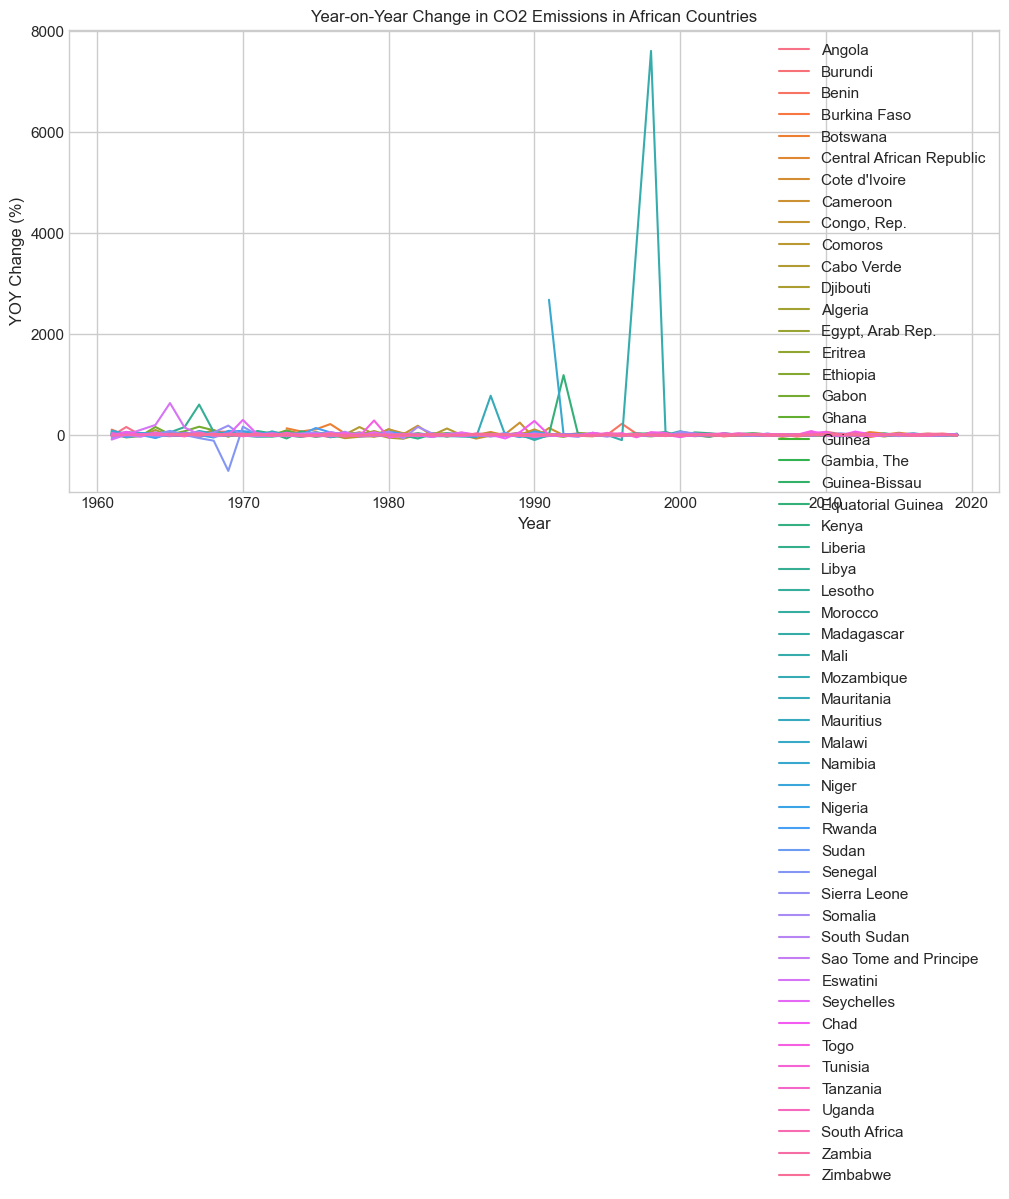

In [21]:
# Calculate year-on-year change in CO2 emissions for African countries
df_africa['YOY_change'] = df_africa.groupby('Country')['CO2_emissions'].pct_change() * 100

# Drop NaN values resulting from pct_change calculation
df_africa.dropna(subset=['YOY_change'], inplace=True)

# Visualize year-on-year change for Africa
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='YOY_change', hue='Country', data=df_africa)
plt.title('Year-on-Year Change in CO2 Emissions in African Countries')
plt.xlabel('Year')
plt.ylabel('YOY Change (%)')
plt.legend(loc='upper right')
plt.show()

In [22]:
# Interactive map of CO2 emissions in Africa
fig = px.choropleth(df_africa, 
                    locations="Country_Code", 
                    color="CO2_emissions", 
                    hover_name="Country", 
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='CO2 Emissions in Africa Over Time')

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

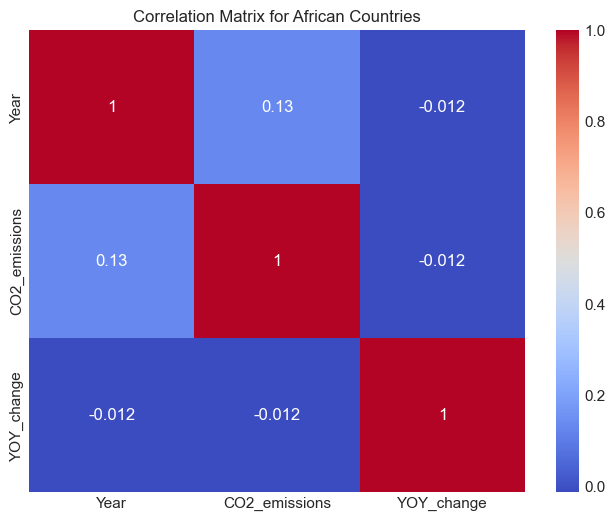

In [23]:
# Correlation matrix for African countries
corr_matrix_africa = df_africa[['Year', 'CO2_emissions', 'YOY_change']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_africa, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for African Countries')
plt.show()

In [10]:
# Define African regions
african_regions = df_africa['region'].unique()

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Correlation Heatmaps by African Region', fontsize=16)

# Loop through each region and plot the heatmap
for i, region in enumerate(african_regions):
    # Filter data for the current region
    data_filtered = df_africa[df_africa['region'] == region]
    
    # Calculate the correlation matrix
    correlation_matrix = data_filtered[['year', 'emissions_kt']].corr(method='kendall')
    
    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Correlation Heatmap - {region}')

# Hide the unused subplot (bottom right corner)
fig.delaxes(axes[2, 1])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

NameError: name 'df_africa' is not defined

## Cluster Analysis

In [26]:
# Calculate the average CO2 emissions for each African country
df_africa_avg = df_africa.groupby('Country')['CO2_emissions'].mean().reset_index()

# Standardize the data (scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_africa_avg['CO2_emissions_scaled'] = scaler.fit_transform(df_africa_avg[['CO2_emissions']])

# Display the first few rows of the scaled data
df_africa_avg.head()


Country  CO2_emissions  CO2_emissions_scaled
0       Algeria   71405.464139              1.392739
1        Angola   11177.999936             -0.051225
2         Benin    1757.671280             -0.277079
3      Botswana    3114.128011             -0.244557
4  Burkina Faso    1054.798632             -0.293930

C:\Users\Azeez.HAMZAT\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Azeez.HAMZAT\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Azeez.HAMZAT\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Azeez.HAMZAT\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads.

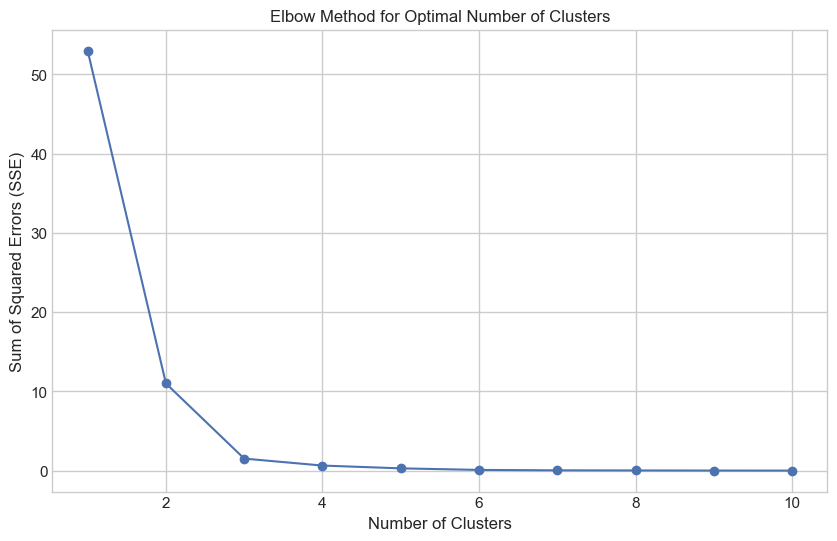

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_africa_avg[['CO2_emissions_scaled']])
    sse.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [28]:
# Apply K-means clustering with the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_africa_avg['Cluster'] = kmeans.fit_predict(df_africa_avg[['CO2_emissions_scaled']])

# Display the first few rows with cluster assignments
df_africa_avg.head()

C:\Users\Azeez.HAMZAT\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Azeez.HAMZAT\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Country  CO2_emissions  CO2_emissions_scaled  Cluster
0       Algeria   71405.464139              1.392739        2
1        Angola   11177.999936             -0.051225        0
2         Benin    1757.671280             -0.277079        0
3      Botswana    3114.128011             -0.244557        0
4  Burkina Faso    1054.798632             -0.293930        0

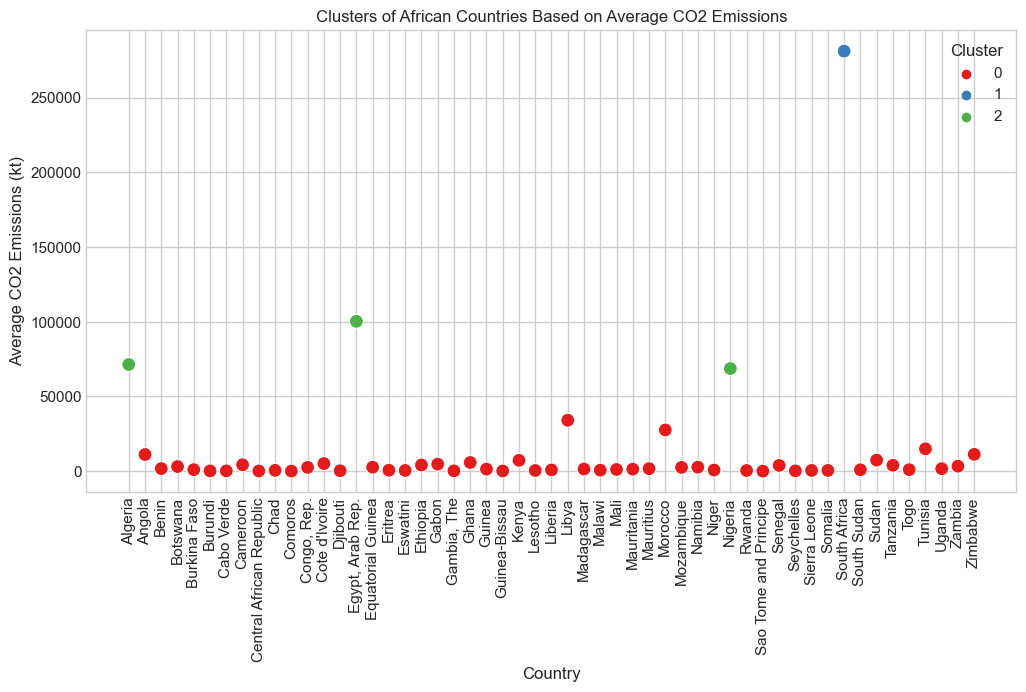

In [29]:
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(12,6))
sns.scatterplot(x='Country', y='CO2_emissions', hue='Cluster', data=df_africa_avg, palette='Set1', s=100)
plt.xticks(rotation=90)
plt.title('Clusters of African Countries Based on Average CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (kt)')
plt.legend(title='Cluster')
plt.show()

In [32]:
import pandas as pd

# Load the dataset
generalDF = pd.read_csv('co2_emissions_kt_by_country.csv')

# Rename columns if necessary
generalDF.columns = ['country_code', 'country_name', 'year', 'value']

# Ensure the region column is present
# If the dataset doesn't have a 'region' column, you may need to create it based on country names


In [34]:
# Example: Adding a region column (this is a simplified example)
# You would need a mapping from country names to regions
african_regions_mapping = {
    'Algeria': 'Northern Africa',
    'Nigeria': 'Western Africa',
    'Kenya': 'Eastern Africa',
    # Add more mappings as necessary
}

# Map the country names to regions
generalDF['region'] = generalDF['country_name'].map(african_regions_mapping)

# Drop any rows with NaN in the region column (i.e., countries not mapped)
generalDF = generalDF.dropna(subset=['region'])



Machine Learning and Predictive Modeling

co2_emission_video.mp4



In [41]:
# Load the dataset
df = pd.read_csv('co2_emissions_kt_by_country.csv')

# Rename columns if necessary
df.columns = ['country_code', 'country_name', 'year', 'emissions_kt']
# 
# Display basic information about the dataset
# print(df.info())
print(df.head())


  country_code country_name  year  emissions_kt
0          ABW        Aruba  1960     11092.675
1          ABW        Aruba  1961     11576.719
2          ABW        Aruba  1962     12713.489
3          ABW        Aruba  1963     12178.107
4          ABW        Aruba  1964     11840.743


In [52]:
# Define a dictionary mapping African countries to their regions
african_regions_mapping = {
    'Algeria': 'Northern Africa',
    'Egypt': 'Northern Africa',
    'Libya': 'Northern Africa',
    'Mauritania': 'Northern Africa',
    'Morocco': 'Northern Africa',
    'Sudan': 'Northern Africa',
    'Tunisia': 'Northern Africa',
    'Western Sahara': 'Northern Africa',
    'Benin': 'Western Africa',
    'Burkina Faso': 'Western Africa',
    'Cape Verde': 'Western Africa',
    'Côte d\'Ivoire': 'Western Africa',
    'Gambia': 'Western Africa',
    'Ghana': 'Western Africa',
    'Guinea': 'Western Africa',
    'Guinea-Bissau': 'Western Africa',
    'Liberia': 'Western Africa',
    'Mali': 'Western Africa',
    'Niger': 'Western Africa',
    'Nigeria': 'Western Africa',
    'Senegal': 'Western Africa',
    'Sierra Leone': 'Western Africa',
    'Togo': 'Western Africa',
    'Angola': 'Central Africa',
    'Cameroon': 'Central Africa',
    'Central African Republic': 'Central Africa',
    'Chad': 'Central Africa',
    'Congo (Brazzaville)': 'Central Africa',
    'Congo (Kinshasa)': 'Central Africa',
    'Equatorial Guinea': 'Central Africa',
    'Gabon': 'Central Africa',
    'São Tomé and Príncipe': 'Central Africa',
    'Burundi': 'Eastern Africa',
    'Comoros': 'Eastern Africa',
    'Djibouti': 'Eastern Africa',
    'Eritrea': 'Eastern Africa',
    'Ethiopia': 'Eastern Africa',
    'Kenya': 'Eastern Africa',
    'Madagascar': 'Eastern Africa',
    'Malawi': 'Eastern Africa',
    'Mauritius': 'Eastern Africa',
    'Mozambique': 'Eastern Africa',
    'Rwanda': 'Eastern Africa',
    'Seychelles': 'Eastern Africa',
    'Somalia': 'Eastern Africa',
    'South Sudan': 'Eastern Africa',
    'Tanzania': 'Eastern Africa',
    'Uganda': 'Eastern Africa',
    'Zambia': 'Eastern Africa',
    'Zimbabwe': 'Eastern Africa',
    'Botswana': 'Southern Africa',
    'Eswatini (Swaziland)': 'Southern Africa',
    'Lesotho': 'Southern Africa',
    'Namibia': 'Southern Africa',
    'South Africa': 'Southern Africa'
}

# Apply the mapping to your DataFrame
df_africa['region'] = df_africa['country_name'].map(african_regions_mapping)

# Ensure only African countries are included
df_africa = df_africa.dropna(subset=['region'])

# Display the DataFrame to verify
print(df_africa.head())

     country_code country_name  year  emissions_kt           region
3182          DZA      Algeria  1960      6160.560  Northern Africa
3183          DZA      Algeria  1961      6065.218  Northern Africa
3184          DZA      Algeria  1962      5669.182  Northern Africa
3185          DZA      Algeria  1963      5427.160  Northern Africa
3186          DZA      Algeria  1964      5650.847  Northern Africa


C:\Users\Azeez.HAMZAT\AppData\Local\Temp\ipykernel_26888\3505291082.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 3182 to 13840
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  240 non-null    object 
 1   country_name  240 non-null    object 
 2   year          240 non-null    int64  
 3   emissions_kt  240 non-null    float64
 4   region        240 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 11.2+ KB


                 count           mean            std        min           25%  \
region                                                                          
Eastern Africa    60.0    7222.644340    4700.572273   2401.885    4101.53950   
Northern Africa   60.0   70318.049070   45815.829743   5427.160   36742.42325   
Southern Africa   60.0  278008.310173  108542.783023  97934.569  183085.05925   
Western Africa    60.0   67596.563920   34061.404066   3406.643   48069.78625   

                         50%            75%            max  
region                                                      
Eastern Africa     5880.0000    8319.999771   22280.000687  
Northern Africa   73198.1415   90664.999008  171250.000000  
Southern Africa  279579.5935  378184.997559  447929.992676  
Western Africa    73137.5075   95084.999084  115279.998779  


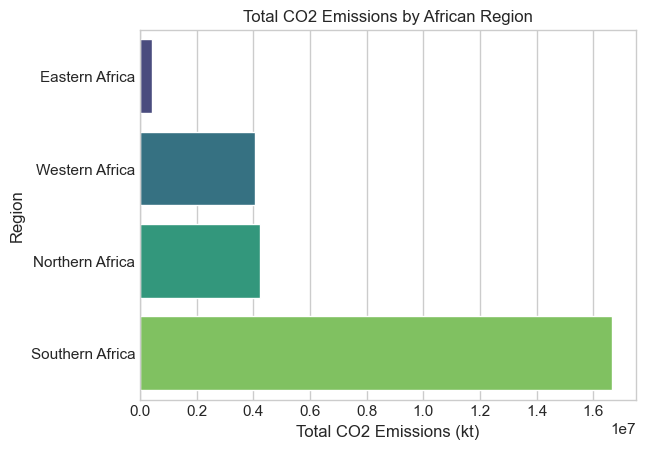

In [54]:
# Summary statistics by region
summary_stats = df_africa.groupby('region')['emissions_kt'].describe()
print(summary_stats)

# Plot total emissions by region
import seaborn as sns
import matplotlib.pyplot as plt

total_emissions_by_region = df_africa.groupby('region')['emissions_kt'].sum().sort_values()
sns.barplot(x=total_emissions_by_region.values, y=total_emissions_by_region.index, palette="viridis")
plt.title('Total CO2 Emissions by African Region')
plt.xlabel('Total CO2 Emissions (kt)')
plt.ylabel('Region')
plt.show()


C:\Users\Azeez.HAMZAT\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Azeez.HAMZAT\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



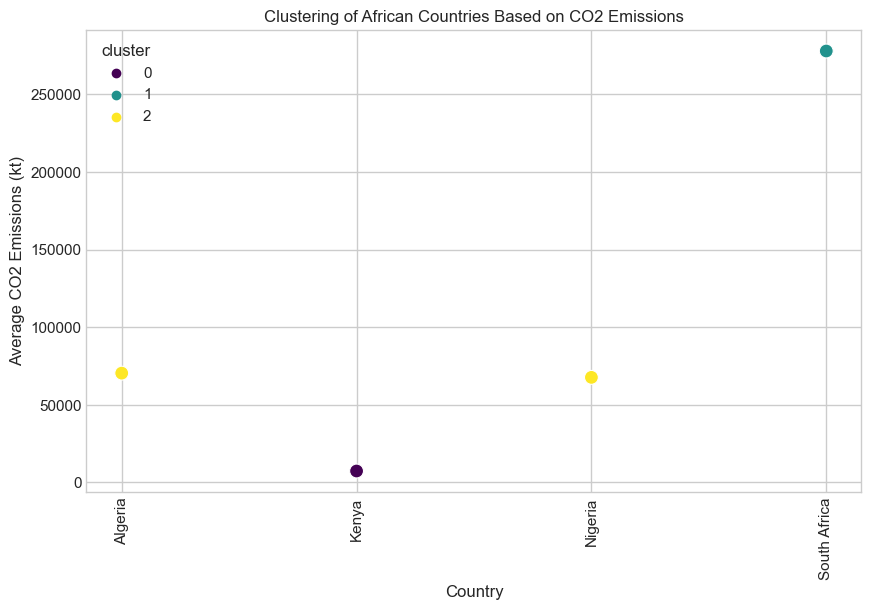

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Prepare the data for clustering
df_clustering = df_africa.groupby(['country_name'])['emissions_kt'].mean().reset_index()
X = df_clustering[['emissions_kt']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='country_name', y='emissions_kt', hue='cluster', data=df_clustering, palette="viridis", s=100)
plt.title('Clustering of African Countries Based on CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (kt)')
plt.xticks(rotation=90)
plt.show()

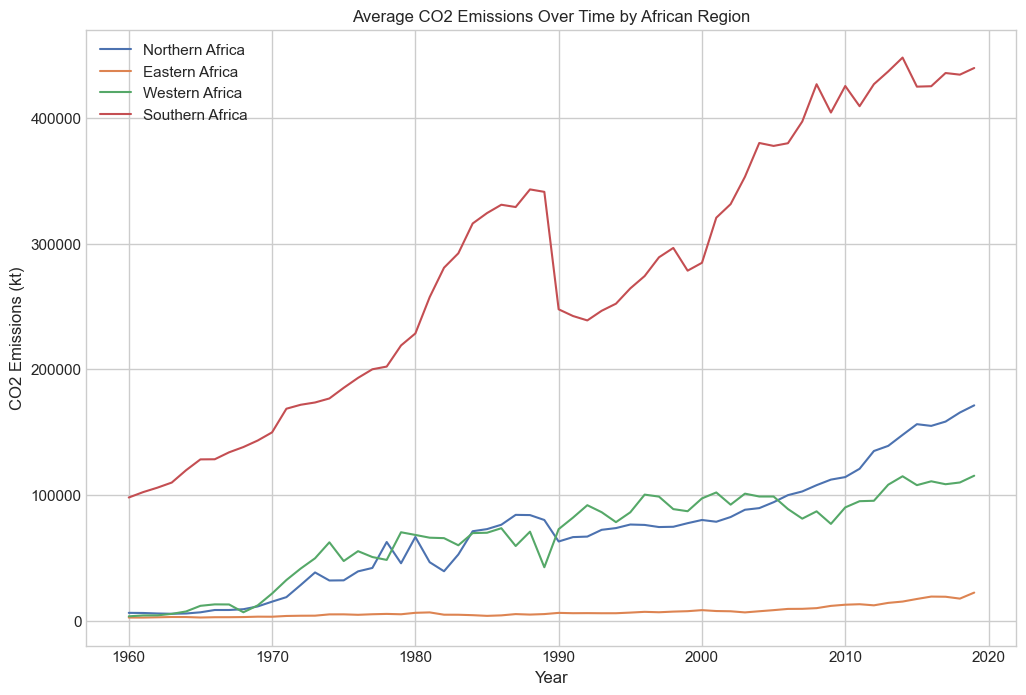

In [55]:
# Plot the trend of CO2 emissions over time for each region
plt.figure(figsize=(12, 8))
for region in df_africa['region'].unique():
    region_data = df_africa[df_africa['region'] == region].groupby('year')['emissions_kt'].mean()
    plt.plot(region_data, label=region)

plt.title('Average CO2 Emissions Over Time by African Region')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.legend()
plt.show()